# K-Means Clustering

K-Means is an **unsupervised machine learning algorithm** used for clustering data into **K distinct groups**. The main objective is to:  

1. Find **K centroids** representing each cluster.  
2. Assign each data point to the nearest centroid based on distance.  

Once assigned, the algorithm **iteratively refines** the clusters to improve accuracy.

### 🔹 **How K-Means Works**
1. **Initialize** K cluster centroids randomly.  
2. **Compute** the distance of each data point from all centroids.  
3. **Assign** each data point to the nearest centroid.  
4. **Recalculate** centroids as the mean of all assigned points.  
5. **Repeat** steps 2-4 until centroids no longer change significantly.

### 🔹 **Key Characteristics**
- K-Means works **only with Euclidean distance**.  
- It aims to **minimize inertia** (within-cluster variation).  
- The number of clusters (**K**) must be specified in advance.  

This method is widely used in **image segmentation, customer segmentation, and anomaly detection**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

## Prepare the Data
#### Select the logs the case study recommends for clustering and handle any missing values. Then, scale the data so that each log has equal importance.

In [3]:
data=pd.read_csv('../../data/final-data.csv')
df=data.copy()


In [4]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,6.965,16.865,0.191740,2.453403,Original
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,5.465,19.665,0.194048,2.442677,Original
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,5.650,20.450,0.196299,2.434675,Original
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,6.165,20.065,0.216384,2.433603,Original
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,6.550,20.050,0.183564,2.430550,Original


In [21]:
n = len(df)
p = 6 # we have 3 features)
print('We have {:d} data points, and each one has {:d} features'.format(n, p))

We have 4149 data points, and each one has 6 features


In [20]:
features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND','NM_M', 'RELPOS']
X_unsupervised = df[features].copy()

# Drop rows with any missing log values in our feature set
X_unsupervised.dropna(inplace=True)


# Scale the data - This is CRITICAL for K-Means!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

##### Find the Optimal Number of Clusters (k)

In [8]:
import os

# Ensure the folder exists
os.makedirs("../figures/Unsupervised", exist_ok=True)


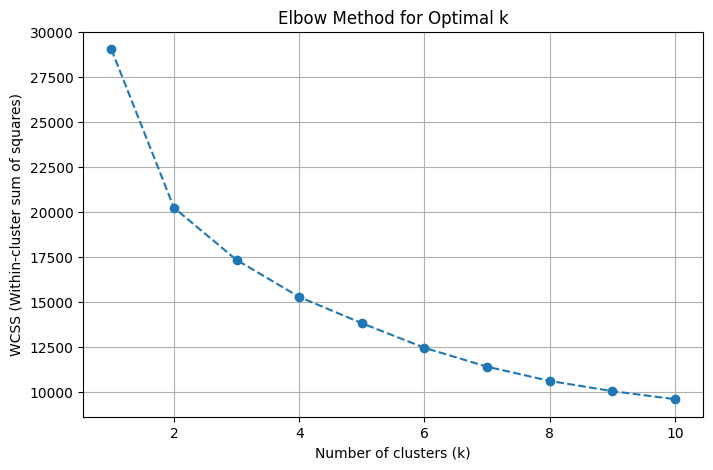

In [10]:
# --- Elbow Method to find optimal k ---
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='random', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig(f"../../figures/Unsupervised/Elbow-method.png", dpi=300, bbox_inches="tight")

plt.show()

In [25]:
features = df.drop(columns=['Facies', 'Formation', 'Well Name'])
features = features.dropna()
features.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
0,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,6.965,16.865,0.191740,2.453403,Original
1,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,5.465,19.665,0.194048,2.442677,Original
2,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,5.650,20.450,0.196299,2.434675,Original
3,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,6.165,20.065,0.216384,2.433603,Original
4,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,6.550,20.050,0.183564,2.430550,Original


# Check other methods for optimal K

k=2, silhouette score=0.301
k=3, silhouette score=0.250
k=4, silhouette score=0.273
k=5, silhouette score=0.279
k=6, silhouette score=0.232
k=7, silhouette score=0.231
k=8, silhouette score=0.233
k=9, silhouette score=0.221
k=10, silhouette score=0.217


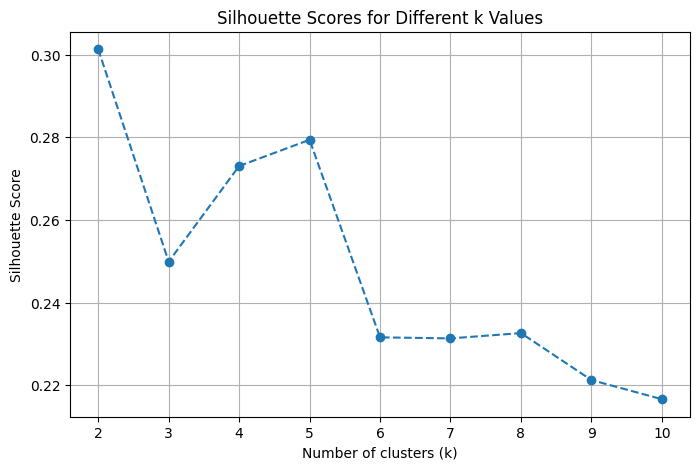

In [11]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42).fit(X_scaled)
    labels = kmeans.labels_
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k={k}, silhouette score={sil:.3f}")
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.grid(True)
plt.savefig(f"../../figures/Unsupervised/Silhouette-score-method.png", dpi=300, bbox_inches="tight")

plt.show()

### Davies–Bouldin Index (DBI)

Ratio of intra-cluster similarity to inter-cluster separation.

Lower DBI = better clustering.

#### Calinski–Harabasz Index (Variance Ratio Criterion)

Ratio of between-cluster variance to within-cluster variance.

Higher values → better clustering.

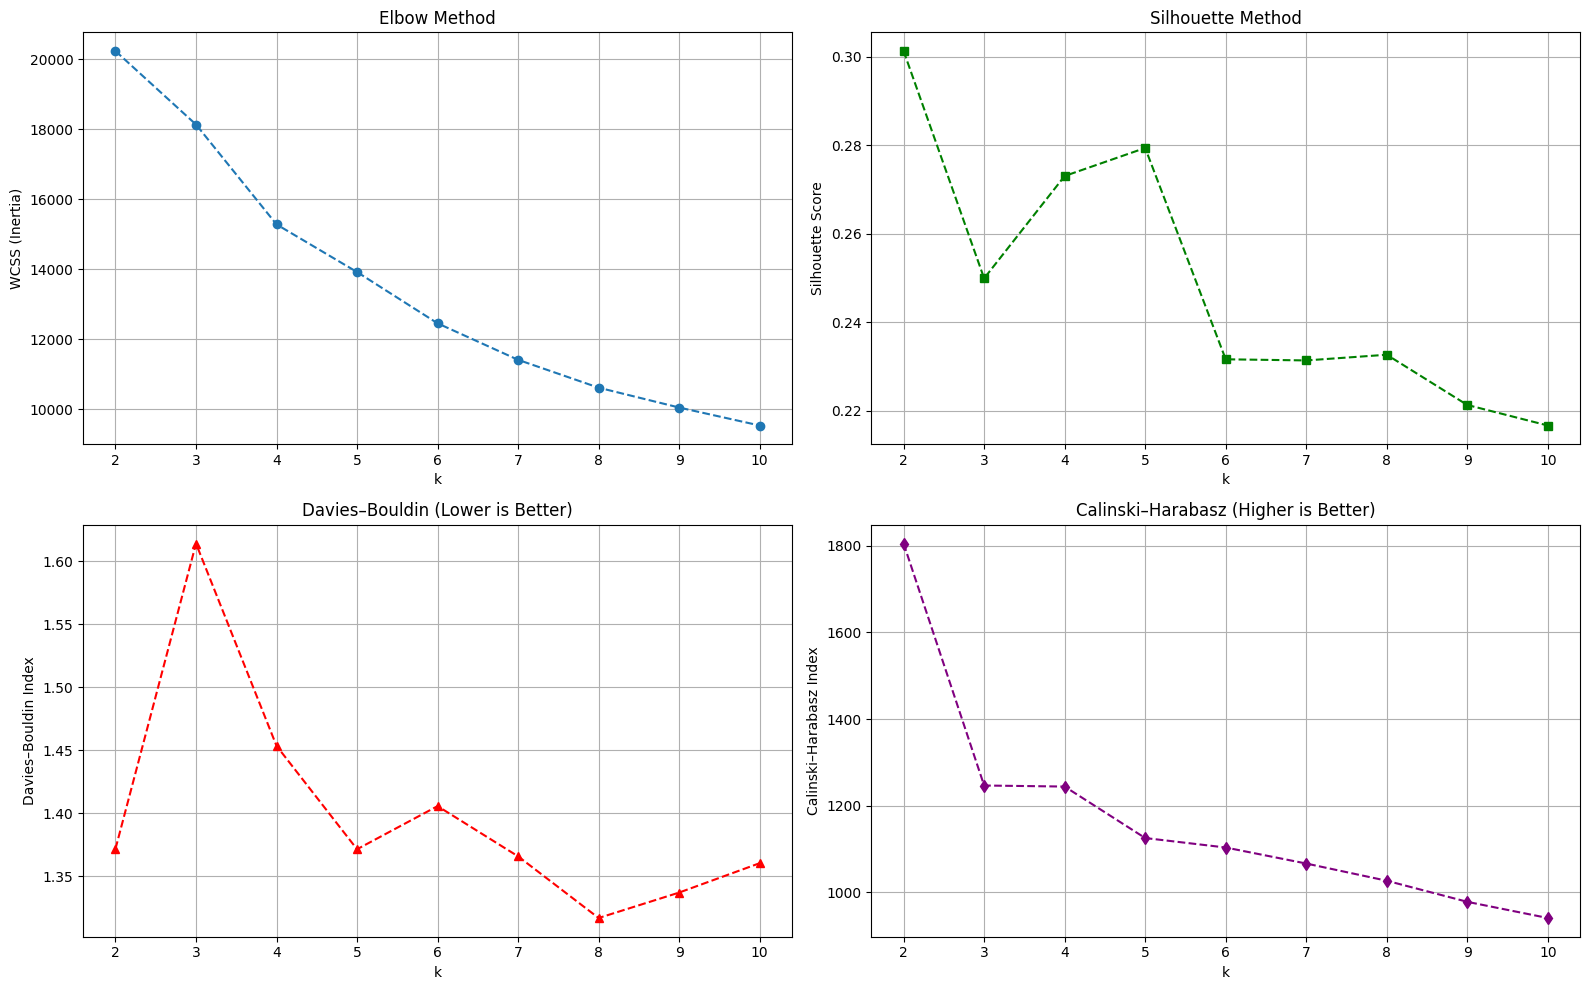

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# --- Features ---
features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE','NM_M', 'RELPOS']
X_unsupervised = df[features].copy()
X_unsupervised.dropna(inplace=True)

# --- Scale data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

# --- Ranges ---
k_values = range(2, 11)

# --- Metrics containers ---
wcss = []
silhouette_scores = []
dbi_scores = []
ch_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Elbow
    wcss.append(kmeans.inertia_)
    
    # Silhouette
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    
    # Davies–Bouldin
    dbi_scores.append(davies_bouldin_score(X_scaled, labels))
    
    # Calinski–Harabasz
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))

# --- Plot results ---
plt.figure(figsize=(16, 10))

# Elbow
plt.subplot(2, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel("k")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.grid(True)

# Silhouette
plt.subplot(2, 2, 2)
plt.plot(k_values, silhouette_scores, marker='s', color='green', linestyle='--')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.grid(True)

# Davies–Bouldin
plt.subplot(2, 2, 3)
plt.plot(k_values, dbi_scores, marker='^', color='red', linestyle='--')
plt.xlabel("k")
plt.ylabel("Davies–Bouldin Index")
plt.title("Davies–Bouldin (Lower is Better)")
plt.grid(True)

# Calinski–Harabasz
plt.subplot(2, 2, 4)
plt.plot(k_values, ch_scores, marker='d', color='purple', linestyle='--')
plt.xlabel("k")
plt.ylabel("Calinski–Harabasz Index")
plt.title("Calinski–Harabasz (Higher is Better)")
plt.grid(True)

plt.tight_layout()
plt.savefig(f"../../figures/Unsupervised/Different-method-for-optimal-K.png", dpi=300, bbox_inches="tight")

plt.show()


In [13]:
# Let's assume the optimal k is 5
optimal_k = 8

# Run K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# Fit on scaled data but get the indices from the unscaled data
kmeans.fit(X_scaled)

# Add the new 'KMeans_Facies' labels to the DataFrame

# Ensure you align the labels correctly if you dropped NaNs
df.loc[X_unsupervised.index, 'KMeans_Facies'] = kmeans.labels_

In [14]:
df['Facies'].unique()


array([3, 2, 8, 6, 7, 4, 5, 9, 1])

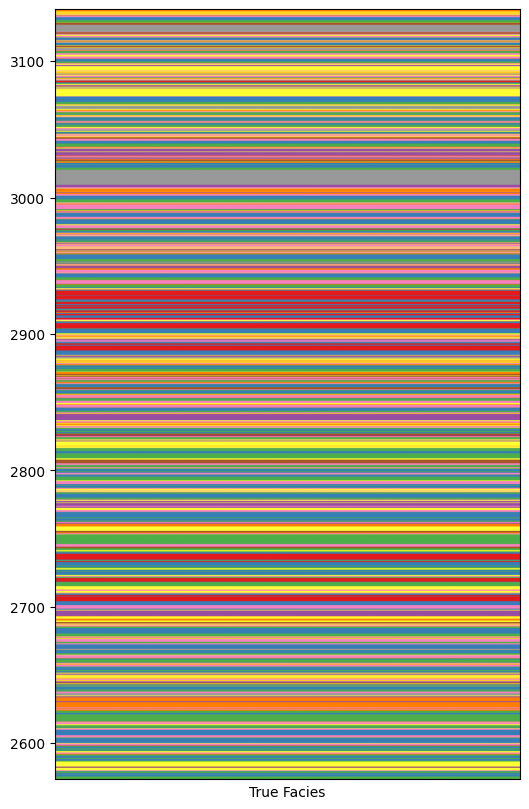

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Your facies classes
facies_classes = np.array([1,2,3,4,5,6,7,8,9])

# Assign custom colors to each facies
facies_colors = [
    '#e41a1c',  # 1 = red
    '#377eb8',  # 2 = blue
    '#4daf4a',  # 3 = green
    '#984ea3',  # 4 = purple
    '#ff7f00',  # 5 = orange
    '#ffff33',  # 6 = yellow
    '#a65628',  # 7 = brown
    '#f781bf',  # 8 = pink
    '#999999'   # 9 = grey
]

# Build categorical colormap
cmap_facies = ListedColormap(facies_colors, name='facies_cmap')
norm_facies = BoundaryNorm(np.arange(0.5, 10.5, 1), cmap_facies.N)

# Example plot: replace 'Facies' with your column
plt.figure(figsize=(6, 10))
plt.imshow(df[['Facies']].to_numpy(),
           aspect='auto',
           extent=[0, 1, df['Depth'].max(), df['Depth'].min()],
           cmap=cmap_facies, norm=norm_facies)

plt.xlabel("True Facies")
plt.xticks([])
plt.gca().invert_yaxis()
plt.show()


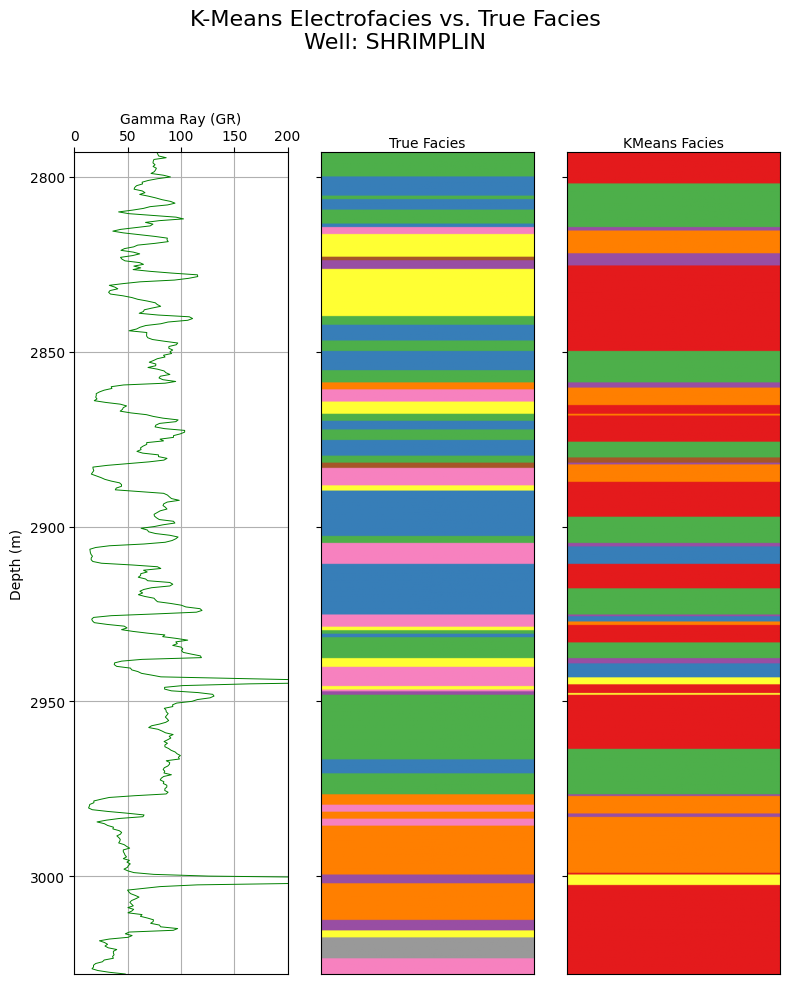

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

well_name = 'SHRIMPLIN' 
well_to_plot = df[df['Well Name'] == well_name].copy()
well_to_plot.sort_values(by='Depth', inplace=True)

# --- Facies color setup ---
facies_classes = np.array([1,2,3,4,5,6,7,8,9])
facies_colors = [
    '#e41a1c',  # 1 = red
    '#377eb8',  # 2 = blue
    '#4daf4a',  # 3 = green
    '#984ea3',  # 4 = purple
    '#ff7f00',  # 5 = orange
    '#ffff33',  # 6 = yellow
    '#a65628',  # 7 = brown
    '#f781bf',  # 8 = pink
    '#999999'   # 9 = grey
]
cmap_facies = ListedColormap(facies_colors, name='facies_cmap')
norm_facies = BoundaryNorm(np.arange(0.5, 10.5, 1), cmap_facies.N)

# --- 2. SAFETY CHECK ---
if well_to_plot.empty:
    print(f"Error: No data found for well '{well_name}'. Please check the name and try again.")
else:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 10), sharey=True)
    fig.suptitle(f'K-Means Electrofacies vs. True Facies\nWell: {well_name}', fontsize=16)

    # 1. Gamma Ray Log Track
    ax1 = axes[0]
    ax1.plot(well_to_plot['GR'], well_to_plot['Depth'], color='green', lw=0.7)
    ax1.set_xlabel('Gamma Ray (GR)')
    ax1.set_xlim(0, 200)
    ax1.grid(which='major', linestyle='-')
    ax1.set_ylabel('Depth (m)')
    ax1.invert_yaxis()
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')

    # 2. True Facies Track (categorical colors)
    ax2 = axes[1]
    ax2.imshow(well_to_plot[['Facies']].to_numpy(), aspect='auto',
               extent=[0, 1, well_to_plot['Depth'].max(), well_to_plot['Depth'].min()],
               cmap=cmap_facies, norm=norm_facies)
    ax2.set_xlabel('True Facies')
    ax2.set_xticks([])
    ax2.invert_yaxis()
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')

    # 3. K-Means Facies Track (categorical colors)
    ax3 = axes[2]
    ax3.imshow(well_to_plot[['KMeans_Facies']].to_numpy(), aspect='auto',
               extent=[0, 1, well_to_plot['Depth'].max(), well_to_plot['Depth'].min()],
               cmap=cmap_facies, norm=norm_facies)
    ax3.set_xlabel('KMeans Facies')
    ax3.set_xticks([])
    ax3.invert_yaxis()
    ax3.xaxis.set_ticks_position('top')
    ax3.xaxis.set_label_position('top') 
    # --- Final plot adjustments ---
    for ax in axes:
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('top')

    fig.gca().invert_yaxis()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"../../figures/Unsupervised/Facies-by-Kmeans.png", dpi=300, bbox_inches="tight")

    plt.show()
